In [1]:
%pylab inline
import numpy as np
import pymc3 as pm

from sklearn.metrics import confusion_matrix

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = np.load(pm.get_data('extrahard_MC_500_5_4.npz.npy'))
z_true = np.load(pm.get_data('extrahard_MC_500_5_4_reference_classes.npy'))

In [3]:
I = data.shape[0]               # number of items
J = data.shape[1]               # number of annotators
K = data.shape[2]               # number of classes
N = I * J

In [4]:
# create data triplets
jj = list()  # annotator IDs
ii = list()  # item IDs
y = list()   # response

# initialize true category with majority votes
z_init = np.zeros( I, dtype=np.int64 )

# create data triplets
for i in range( I ):
    ks = list()
    for j in range( J ):
        dat = data[ i, j, : ]
        k = np.where( dat == 1 )[0][0]
        ks.append( k )
        ii.append( i )
        jj.append( j )
        y.append( k )

    # getting maj vote for work item i (dealing with numpy casts)
    z_init[ i ] = np.bincount( np.array( ks ) ).argmax()

In [5]:
len(z_init),I

(500, 500)

In [6]:

confMat = confusion_matrix( z_true, z_init )
print( "Majority vote estimate of true category:\n" , confMat )

Majority vote estimate of true category:
 [[120   2   1   2]
 [  5 116   4   0]
 [  4   6 113   2]
 [  4   3   3 115]]


In [34]:

# class prevalence (flat prior)
alpha = np.ones( K )

# individual annotator confusion matrices - dominant diagonal
beta = np.ones( (K,K) ) + np.diag( np.ones(K) )

In [35]:
beta

array([[2., 1., 1., 1.],
       [1., 2., 1., 1.],
       [1., 1., 2., 1.],
       [1., 1., 1., 2.]])

In [24]:
import pandas as pd

In [25]:
a=pd.DataFrame()
a['i'] = ii
a['j'] = jj
a['y'] = y

In [26]:
a

,i,j,y
0,0,0,2
1,0,1,3
2,0,2,1
3,0,3,1
4,0,4,3
5,1,0,0
6,1,1,0
7,1,2,3
8,1,3,2
9,1,4,0


In [27]:
len(ii)

2500

In [28]:
z_init

array([1, 0, 1, 2, 0, 1, 3, 1, 0, 2, 1, 0, 3, 1, 2, 0, 3, 2, 0, 3, 3, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 3, 0, 1, 3, 1, 2, 0, 2, 1, 3, 2, 2, 1,
       1, 1, 3, 0, 1, 2, 0, 3, 2, 0, 0, 1, 2, 1, 0, 3, 0, 1, 0, 3, 3, 1,
       3, 3, 2, 0, 2, 3, 0, 2, 2, 1, 1, 0, 2, 0, 0, 2, 0, 1, 3, 0, 0, 2,
       3, 3, 2, 0, 1, 2, 1, 3, 1, 3, 0, 0, 2, 0, 3, 3, 2, 2, 3, 1, 0, 1,
       1, 2, 2, 0, 1, 2, 0, 0, 3, 1, 3, 1, 0, 0, 2, 1, 2, 3, 0, 2, 1, 1,
       2, 3, 2, 1, 3, 0, 1, 1, 1, 3, 2, 2, 0, 0, 1, 1, 3, 0, 0, 2, 2, 0,
       1, 1, 0, 1, 1, 3, 1, 1, 1, 0, 3, 0, 3, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       1, 2, 2, 3, 2, 2, 3, 0, 3, 1, 2, 1, 1, 0, 3, 2, 3, 0, 2, 0, 1, 2,
       1, 3, 1, 2, 1, 0, 2, 0, 1, 2, 3, 1, 2, 2, 1, 3, 0, 0, 1, 1, 0, 3,
       1, 0, 1, 0, 3, 0, 1, 1, 0, 1, 0, 0, 1, 2, 0, 2, 1, 2, 1, 2, 2, 0,
       3, 0, 0, 3, 1, 1, 3, 1, 3, 0, 3, 2, 3, 2, 2, 3, 0, 2, 1, 2, 1, 3,
       1, 0, 0, 1, 1, 2, 2, 3, 3, 3, 1, 0, 2, 1, 2, 0, 0, 2, 1, 3, 2, 3,
       2, 2, 3, 3, 1, 2, 3, 0, 0, 2, 0, 2, 1, 2, 2,

In [29]:
ii

[0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 16,
 16,
 16,
 16,
 16,
 17,
 17,
 17,
 17,
 17,
 18,
 18,
 18,
 18,
 18,
 19,
 19,
 19,
 19,
 19,
 20,
 20,
 20,
 20,
 20,
 21,
 21,
 21,
 21,
 21,
 22,
 22,
 22,
 22,
 22,
 23,
 23,
 23,
 23,
 23,
 24,
 24,
 24,
 24,
 24,
 25,
 25,
 25,
 25,
 25,
 26,
 26,
 26,
 26,
 26,
 27,
 27,
 27,
 27,
 27,
 28,
 28,
 28,
 28,
 28,
 29,
 29,
 29,
 29,
 29,
 30,
 30,
 30,
 30,
 30,
 31,
 31,
 31,
 31,
 31,
 32,
 32,
 32,
 32,
 32,
 33,
 33,
 33,
 33,
 33,
 34,
 34,
 34,
 34,
 34,
 35,
 35,
 35,
 35,
 35,
 36,
 36,
 36,
 36,
 36,
 37,
 37,
 37,
 37,
 37,
 38,
 38,
 38,
 38,
 38,
 39,
 39,
 39,
 39,
 39,
 40,
 40,
 40,
 40,
 40,
 41,
 41,
 41,
 41,
 41,


In [33]:
J

5

In [79]:
import theano.tensor as tt
model = pm.Model()

with model:
    goodness = pm.Gamma('goodness', mu=1,sd=1,shape=J)
    beta = []
    for i in range(J):
        beta.append(np.ones( (K,K) ) + goodness[i]* np.diag( np.ones(K) ))
    beta = tt.as_tensor_variable(beta)
    beta = beta.reshape((J,K,K))
    pi = pm.Dirichlet( 'pi', a=alpha, shape=K )
    #theta = []
    #for i in range(J):
    #    theta.append(pm.Dirichlet( 'theta'+str(i), a=beta[i],shape=(K,K) ))
    #theta = tt.as_tensor_variable(theta)
    #theta = theta.reshape((J,K,K))
    z = pm.Categorical( 'z', p=pi, shape=I, testval=list(z_init) )
    y_obs = pm.Categorical( 'y_obs', p=beta[ jj, z[ ii ] ], observed=y )

/home/alex/anaconda3/envs/main/lib/python3.7/site-packages/theano/tensor/subtensor.py:2190: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])


In [88]:
with model:
    #step1 = pm.Metropolis( vars=[pi] ) #ALEX removed theta to reduce parameters
    #step2 = pm.CategoricalGibbsMetropolis( vars=[z] )
    #step3 = pm.Metropolis(vars=[goodness])
#    trace = pm.sample( 100, step=[step1, step2,step3], progressbar=True, njobs=8 )
    pm.sample( 100,  progressbar=True, njobs=8 )

Only 100 samples in chain.
/home/alex/anaconda3/envs/main/lib/python3.7/site-packages/theano/tensor/subtensor.py:2190: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
Multiprocess sampling (8 chains in 8 jobs)
CompoundStep
>NUTS: [pi, goodness]
>CategoricalGibbsMetropolis: [z]
Sampling 8 chains: 100%|██████████| 4800/4800 [02:19<00:00, 19.30draws/s]


In [89]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
z__0,1.975000,0.851102,0.078661,1.000000,3.000000,62.136286,1.028977
z__1,0.075000,0.468375,0.071151,0.000000,0.000000,NaN,1.060660
z__2,1.000000,0.000000,0.000000,1.000000,1.000000,NaN,NaN
z__3,1.975000,0.222205,0.023717,2.000000,2.000000,NaN,1.000000
z__4,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
z__5,1.000000,0.000000,0.000000,1.000000,1.000000,NaN,NaN
z__6,3.000000,0.000000,0.000000,3.000000,3.000000,NaN,NaN
z__7,1.000000,0.000000,0.000000,1.000000,1.000000,NaN,NaN
z__8,0.287500,0.868817,0.138124,0.000000,3.000000,NaN,1.061242
z__9,2.000000,0.000000,0.000000,2.000000,2.000000,NaN,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f151db38048>,
      dtype=object)

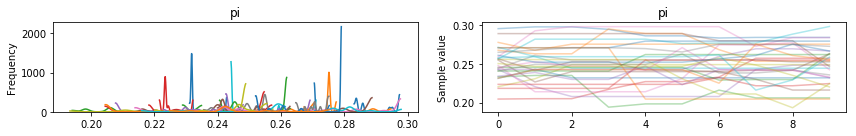

In [90]:
pm.traceplot( trace, varnames=['pi'] )

In [91]:
z = trace['z'][-1000:,:]

z_hat = np.zeros( I )
for i in range( I ):
    z_hat[ i ] = np.bincount( z[:,i] ).argmax()

In [92]:
confMat = confusion_matrix( z_true, z_hat )
print( "Dawid-Skene estimate of true category:\n", confMat )

Dawid-Skene estimate of true category:
 [[123   1   1   0]
 [  1 118   4   2]
 [  2   2 118   3]
 [  3   2   1 119]]


In [54]:
N

2500

In [87]:
np.set_printoptions(precision=2)
for j in range( J ):
    print( "Annotator j=" + str(j) )
    Cj = trace['beta'+str(j)][-1]
    print( Cj )

Annotator j=0


KeyError: 'Unknown variable beta0'

In [48]:
z_hat[3]

2.0

In [49]:
z_init[3]

2

In [51]:
import seaborn as sns

/home/alex/anaconda3/envs/main/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


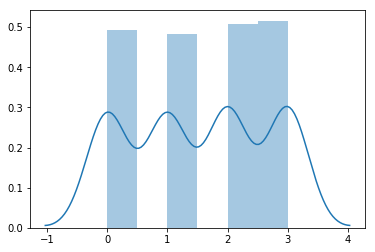

In [53]:
sns.distplot(z_hat)

In [54]:
K

4

In [58]:
z_init.min()

0

In [59]:
type(z_init)

numpy.ndarray

In [60]:
z_init

array([1, 0, 1, 2, 0, 1, 3, 1, 0, 2, 1, 0, 3, 1, 2, 0, 3, 2, 0, 3, 3, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 3, 0, 1, 3, 1, 2, 0, 2, 1, 3, 2, 2, 1,
       1, 1, 3, 0, 1, 2, 0, 3, 2, 0, 0, 1, 2, 1, 0, 3, 0, 1, 0, 3, 3, 1,
       3, 3, 2, 0, 2, 3, 0, 2, 2, 1, 1, 0, 2, 0, 0, 2, 0, 1, 3, 0, 0, 2,
       3, 3, 2, 0, 1, 2, 1, 3, 1, 3, 0, 0, 2, 0, 3, 3, 2, 2, 3, 1, 0, 1,
       1, 2, 2, 0, 1, 2, 0, 0, 3, 1, 3, 1, 0, 0, 2, 1, 2, 3, 0, 2, 1, 1,
       2, 3, 2, 1, 3, 0, 1, 1, 1, 3, 2, 2, 0, 0, 1, 1, 3, 0, 0, 2, 2, 0,
       1, 1, 0, 1, 1, 3, 1, 1, 1, 0, 3, 0, 3, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       1, 2, 2, 3, 2, 2, 3, 0, 3, 1, 2, 1, 1, 0, 3, 2, 3, 0, 2, 0, 1, 2,
       1, 3, 1, 2, 1, 0, 2, 0, 1, 2, 3, 1, 2, 2, 1, 3, 0, 0, 1, 1, 0, 3,
       1, 0, 1, 0, 3, 0, 1, 1, 0, 1, 0, 0, 1, 2, 0, 2, 1, 2, 1, 2, 2, 0,
       3, 0, 0, 3, 1, 1, 3, 1, 3, 0, 3, 2, 3, 2, 2, 3, 0, 2, 1, 2, 1, 3,
       1, 0, 0, 1, 1, 2, 2, 3, 3, 3, 1, 0, 2, 1, 2, 0, 0, 2, 1, 3, 2, 3,
       2, 2, 3, 3, 1, 2, 3, 0, 0, 2, 0, 2, 1, 2, 2,

In [61]:
type(jj)

list

In [62]:
jj

[0,
 1,
 2,
 3,
 4,
 0,
 1,
 2,
 3,
 4,
 0,
 1,
 2,
 3,
 4,
 0,
 1,
 2,
 3,
 4,
 0,
 1,
 2,
 3,
 4,
 0,
 1,
 2,
 3,
 4,
 0,
 1,
 2,
 3,
 4,
 0,
 1,
 2,
 3,
 4,
 0,
 1,
 2,
 3,
 4,
 0,
 1,
 2,
 3,
 4,
 0,
 1,
 2,
 3,
 4,
 0,
 1,
 2,
 3,
 4,
 0,
 1,
 2,
 3,
 4,
 0,
 1,
 2,
 3,
 4,
 0,
 1,
 2,
 3,
 4,
 0,
 1,
 2,
 3,
 4,
 0,
 1,
 2,
 3,
 4,
 0,
 1,
 2,
 3,
 4,
 0,
 1,
 2,
 3,
 4,
 0,
 1,
 2,
 3,
 4,
 0,
 1,
 2,
 3,
 4,
 0,
 1,
 2,
 3,
 4,
 0,
 1,
 2,
 3,
 4,
 0,
 1,
 2,
 3,
 4,
 0,
 1,
 2,
 3,
 4,
 0,
 1,
 2,
 3,
 4,
 0,
 1,
 2,
 3,
 4,
 0,
 1,
 2,
 3,
 4,
 0,
 1,
 2,
 3,
 4,
 0,
 1,
 2,
 3,
 4,
 0,
 1,
 2,
 3,
 4,
 0,
 1,
 2,
 3,
 4,
 0,
 1,
 2,
 3,
 4,
 0,
 1,
 2,
 3,
 4,
 0,
 1,
 2,
 3,
 4,
 0,
 1,
 2,
 3,
 4,
 0,
 1,
 2,
 3,
 4,
 0,
 1,
 2,
 3,
 4,
 0,
 1,
 2,
 3,
 4,
 0,
 1,
 2,
 3,
 4,
 0,
 1,
 2,
 3,
 4,
 0,
 1,
 2,
 3,
 4,
 0,
 1,
 2,
 3,
 4,
 0,
 1,
 2,
 3,
 4,
 0,
 1,
 2,
 3,
 4,
 0,
 1,
 2,
 3,
 4,
 0,
 1,
 2,
 3,
 4,
 0,
 1,
 2,
 3,
 4,
 0,
 1,
 2,
 3,
 4,
 0,
 1,
 2,
 3,
 4,
